# Модуль 3. Практическая работа

## Цели практической работы
1. Закрепить полученные знания о дискретных случайных величинах.
2. Ближе познакомиться с характеристиками случайных величин, изучить на практике дискретные распределения: Бернулли и Пуассона.


## Что входит в практическую работу
  3 практические задачи

## Что оценивается

*  Умение вычислять характеристики случайных величин на основе табличного или графического представления дискретных случайных величин и с использованием формул. \
*  Умение работать с формулами распределений Пуассона и Бернулли.


## Как отправить задание на проверку

Выполните задания, сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него через форму ниже.

## Задача 1

Имеется партия из десяти деталей. Вероятность, что деталь оказалась бракованной, для данной партии составляет $4/5 = 0.8.$ Определите, с какой вероятностью половина деталей окажется бракованной.

Напишите функцию для расчёта этой вероятности. Используете биномиальное распределение.






In [2]:
# Ваше решение
import math

def binom_distr(k,n,p):
  '''
  Биномиальное распределение
  '''
  return math.comb(n, k)*p**k*(1-p)**(n-k)

In [ ]:
n = 10
k = 5
p = 0.8

print(f'Вероятность события, что половина деталей окажется бракованной = {100*binim_distr(k,n,p):.2f}%')

Вероятность события, что половина деталей окажется бракованной = 2.64%


### Задача 2.  

Вратарь последовательно отражает семь ударов в ворота от игрока. Вероятность этого составляет $0.3$ каждый раз независимо от характеристик удара. Найдите вероятность, с которой вратарь отразит хотя бы (= по меньшей мере) три удара. Используете биномиальное распределение.





In [6]:
# Ваше решение
n = 7 # количество ударов
k = 3 # число отбитых ударов
p = 0.3 # вероятность успеха - отбить удар
full_prob = 0
prob = 0

# полная вероятность всех событий
for i in range(0,8):
  full_prob += 100*binom_distr(i,n,p)

print(f'Полная Вероятность = {full_prob:.2f}%')

# вероятность искомого события
for i in range(3,8):
  prob += 100*binom_distr(i,n,p)


print(f'Вероятность события A = (вратарь отразит хотя бы  три удара из 7, т.е. >=3) = {prob:.2f}%')

Полная Вероятность = 100.00%
Вероятность события A = (вратарь отразит хотя бы  три удара из 7, т.е. >=3) = 35.29%


### Задача 3.  

Представьте, что вы сделали бросок пары игральных кубиков десять раз подряд. При каждом броске получаете два значения на двух кубиках. Рассмотрите вероятность, при которой один раз выпадет пара из двух шестёрок. Найдите её:
с помощью биномиального распределения;
с помощью распределения Пуассона, используя закон редких событий.


In [ ]:
# Ваше решение

def puasson_distr(k,lambda_):
  '''
  Распределение Пуассона
  '''
  return 2.718**(-lambda_) * lambda_**k / math.factorial(k)

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}
Количество вариантов: 36


<BarContainer object of 11 artists>

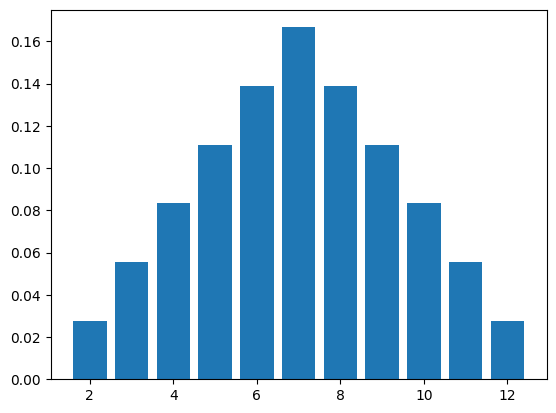

In [ ]:
import itertools
import matplotlib.pyplot as plt

# словарь для подсчета суммы результатов  подбрасывания 2-х костей
numb_bin_res_2 = list(itertools.product(range(1,7), range(1,7))) # декартово произведение 6 костей
dct = dict()
for elem in numb_bin_res_2:
    if sum(elem) not in dct.keys():
        dct[sum(elem)] = 1
    else:
        dct[sum(elem)] += 1
print(dct)
print('Количество вариантов:',sum(dct.values()))

# функциz вероятностей для суммы результатов  подбрасывания 2-х костей
prob_dct = dict()
for i in dct:
  prob_dct[i] = dct[i]/ sum(dct.values())
plt.bar(prob_dct.keys(), prob_dct.values())

In [ ]:
# случайная величина (сумма очков на 2-х костях = 12) задана словарем, где 1 - успех (сумма результатов  подбрасывания 2-х костей = 12)
X = dict([(1,1/36), (0,35/36)])

In [ ]:
n = 10
k = 1
p = 1/36 #теоретическая вероятность выпадения 12 на двух костях

print(f'Вероятность события A = (сумма очков на 2-х костях = 12): {100*binim_distr(k,n,p):.2f}%')

Вероятность события A = (сумма очков на 2-х костях = 12): 21.56%


Найдите вероятность, при которой один раз выпадет пара из двух шестёрок с помощью распределения Пуассона, используя закон редких событий.

# Закон редких событий (Пуассона)

Если вероятность $P$ события $A$ очень мала $(P ≤ 0,1)$, а число испытаний велико, то вероятность того, что событие $A$ наступит $k$ раз в n испытаниях, будет равна

$$P(n,k) = \frac{\lambda^k}{k!} \cdot e^{-\lambda},$$

где $\lambda = n \cdot P = E(X)$ — математическое ожидание $k$ успехов.

Когда число испытаний $n$ велико, а $P$ мало, то закон биномиального распределения и закон редких событий практически совпадает. Это имеет место тогда, когда $P ≤ 0,1$ и $n \cdot P > 4$.

https://studfile.net/preview/4295847/page:7/

In [ ]:
# в нашем случае p = 1/36, тогда чтобы n/36 > 4  => n > 4*36 = 144
# Однако, по условию задачи n = 10. Вычислим искомую вероятность:
p = 1/36 #теоретическая вероятность выпадения 12 на двух костях
n = 10 # число испытаний - бросков 2-х кубиков
k = 1 # ожидаем один успех в 10 бросках

lambda_ = n*p
print(f'Вероятность события A = (1 успех(сумма=12) в 10 бросках 2-х костей]): {100*puasson_distr(k,n*p):.2f}%')

Вероятность события A = (1 успех(сумма=12) в 10 бросках 2-х костей]): 21.04%


Расхождение с результатом, вычисленным с помощью биномиального распределения, пол процента